In [37]:
import pandas as pd
import matplotlib.pyplot as plt

В файле `data/weather.csv` находит архив погоды в г. Санкт-Петербург с 1 января 2008 года по 31 декабря 2016 года. Файл состоит из двух столбцов - дата (**Day**) и средняя дневная температура в этот день (**t**). Прочитать данные в `pandas` можно с помощью кода:

In [38]:
df = pd.read_csv('../data/weather.csv', encoding='utf-8', index_col=False, parse_dates=[0])

In [39]:
df.head(5)

,Day,t
0,2008-01-01,0
1,2008-01-02,-5
2,2008-01-03,-11
3,2008-01-04,-11
4,2008-01-05,-12


С помощью `Pandas` решите следующие задачи

**1.** Определите самый холодный год, в котором среднеяя температура была минимальная и самый теплый год. 

In [40]:
# ваш код
df['year'] = df['Day'].apply(lambda x: x.year)
print(df.groupby(['year']).mean().idxmin())
print(df.groupby(['year']).mean().idxmax())

t    2012
dtype: int64
t    2015
dtype: int64


**2.** Определите год, где в январе было наибольшее число дней с положительной температурой ($\text{t} \ge 0$).

In [41]:
# ваш код
df['month'] = df['Day'].apply(lambda x: x.month)
df[(df['month'] == 1) & (df['t'] >= 0)].groupby(['year']).count().idxmax()['Day']

2008

**3.** В каком году было самое холодное лето (по средней температуре)

In [50]:
# ваш код
df[(df['month'] > 5) & (df['month'] < 9)].groupby(['year']).mean().idxmin()['t']

2008

**4.** Найдите день с самой большим перепадом температуры, если сравнивать со следующим днем. 

In [72]:
# ваш код
print(df.iloc[df.diff()['t'].abs().idxmax() - 1])
print(df.iloc[df.diff()['t'].abs().idxmax()])

Day      2014-05-26 00:00:00
t                         22
year                    2014
month                      5
Name: 2334, dtype: object
Day      2014-05-27 00:00:00
t                          7
year                    2014
month                      5
Name: 2335, dtype: object


**5.** Постройте график среднегодовых температур (по оси $x$ - год, по оси $y$ - средняя температура в этот год).

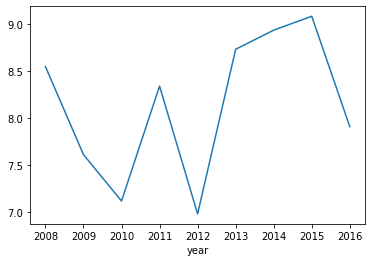

In [77]:
# ваш код
%matplotlib inline
df.groupby(['year']).mean()['t'].plot()